<a href="https://colab.research.google.com/github/aryan-shukal/Data-Analysis/blob/main/Personalized_Healthcare_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Required Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the dataset
file_path = '/content/blood.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# ***Data Exploration & Visualization***

In [ ]:
# Descriptive statistics
data.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


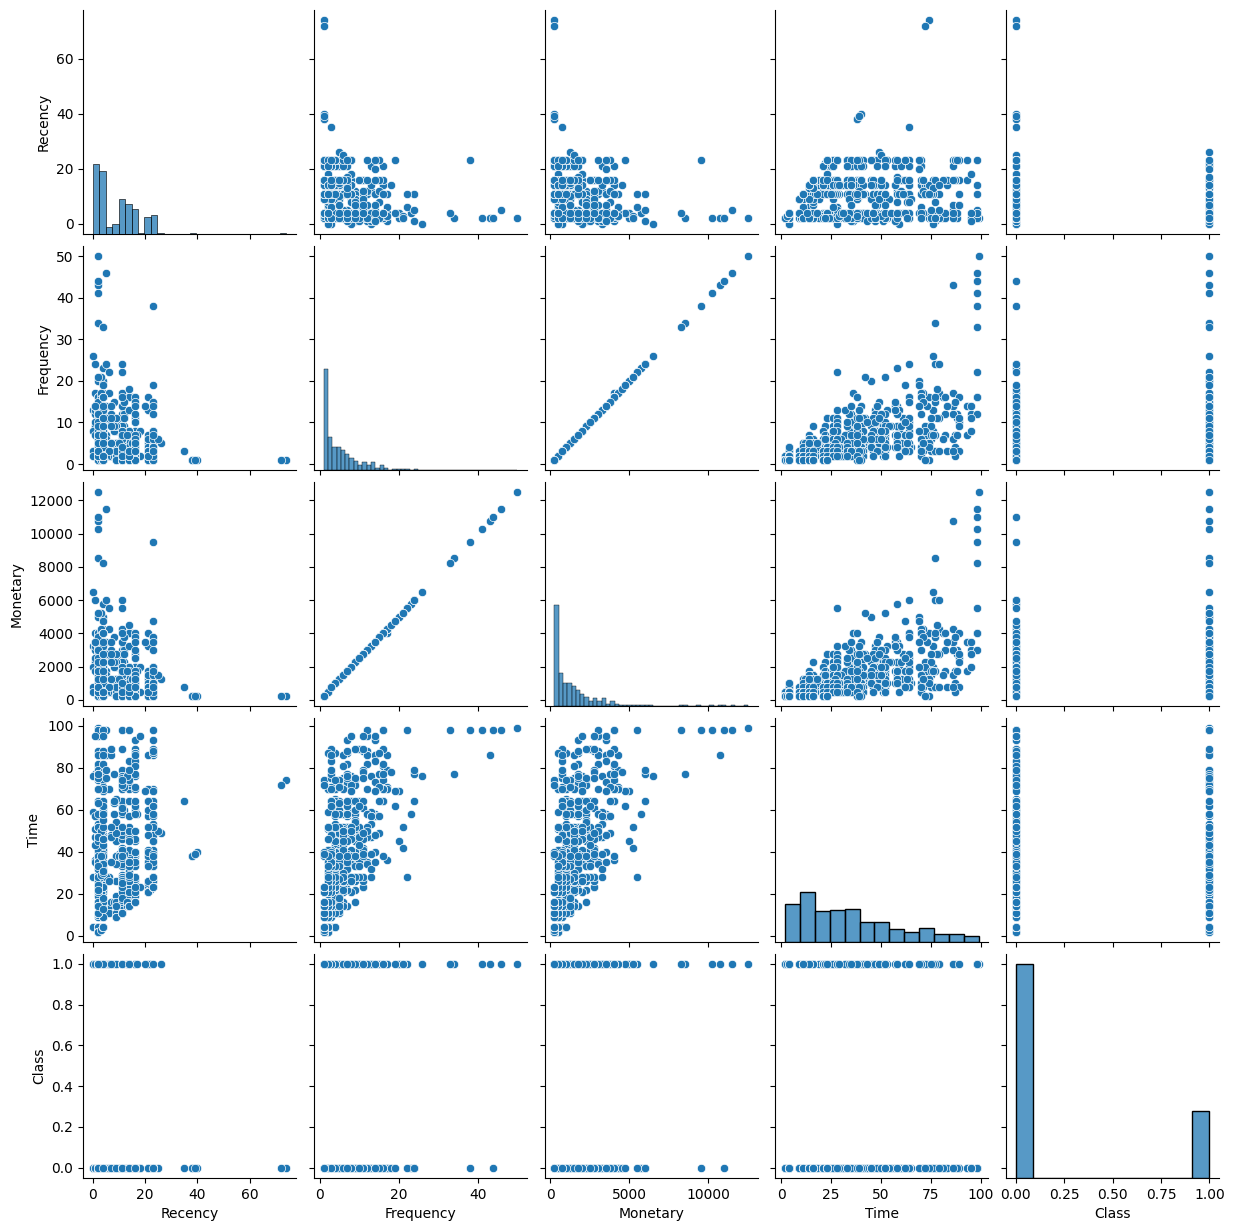

In [ ]:
# Visualize distributions of key features
sns.pairplot(data)
plt.show()

# ***Data Preprocessing***

In [ ]:
# Identify numerical columns
numerical_cols = ['Recency', 'Frequency', 'Monetary', 'Time',]

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

In [ ]:
# Split the data into training and testing sets
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# ***Feature Engineering***

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=4. All the features will be returned.
  warnings.warn(


# ***Model Selection & Training***

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

# ***Model Evaluation***

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.7266666666666667


In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       113
           1       0.41      0.24      0.31        37

    accuracy                           0.73       150
   macro avg       0.60      0.56      0.57       150
weighted avg       0.69      0.73      0.70       150



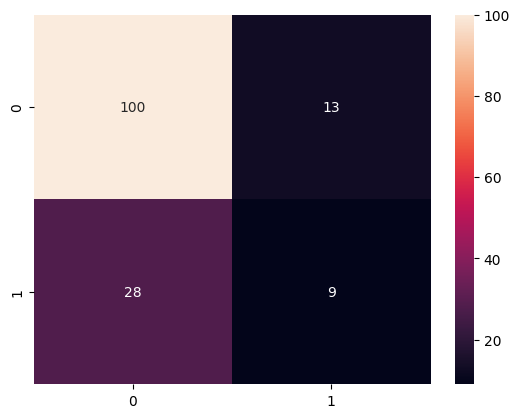

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# ***Recommendation System Implementation***

In [ ]:
# Generate personalized recommendations (mock example)
def generate_recommendations(patient_data):
    # Predict using the trained model
    prediction = model.predict(patient_data)
    # Map predictions to actual recommendations
    recommendation_mapping = {
        0: 'Maintain current lifestyle and schedule regular check-ups',
        1: 'Consider lifestyle changes and consult a healthcare provider'
    }
    return recommendation_mapping[prediction[0]]

In [ ]:
# Example patient data for recommendation generation
example_patient_data = pd.DataFrame({
    'Recency': [1],
    'Frequency': [20],
    'Monetary': [5000],
    'Time': [45]
})

In [ ]:
# Preprocess the example patient data
example_patient_data_transformed = preprocessor.transform(example_patient_data)
# Select features
example_patient_data_selected = selector.transform(example_patient_data_transformed)
# Generate and print recommendations
print(generate_recommendations(example_patient_data_selected))

Consider lifestyle changes and consult a healthcare provider
